In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

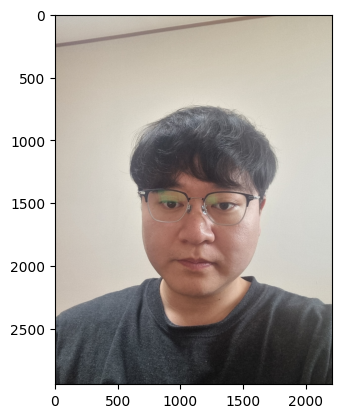

In [ ]:
my_image_path = '/content/drive/MyDrive/face_detection/self.jpg'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(617, 1256) (1575, 2215)]]


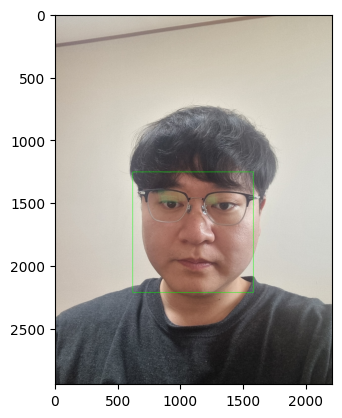

In [ ]:
# hog를 사용해 bounding box 위치 찾기 및 출력
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)
print(dlib_rects)
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    r = dlib_rect.right()
    t = dlib_rect.top()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!mv shape_predictor_68_face_landmarks.dat.bz2 /content/drive/MyDrive/face_detection
!cd /content/drive/MyDrive/face_detection && bzip2 -d ./shape_predictor_68_face_landmarks.dat.bz2

--2025-04-10 09:37:28--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-04-10 09:37:28--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  35.7MB/s    in 1.7s    

2025-04-10 09:37:30 (35.7 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

bzip2: Output file ./shape_predictor_68_face_landmarks.dat already exists.


In [ ]:
model_path = '/content/drive/MyDrive/face_detection/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
print(len(list_landmarks[0]))
print(list_landmarks[0])

68
[(687, 1428), (676, 1559), (677, 1694), (696, 1816), (731, 1940), (791, 2055), (874, 2150), (973, 2223), (1089, 2249), (1211, 2240), (1320, 2183), (1421, 2102), (1493, 1997), (1544, 1878), (1571, 1750), (1583, 1615), (1586, 1480), (755, 1409), (809, 1348), (898, 1337), (984, 1360), (1062, 1397), (1194, 1407), (1270, 1364), (1356, 1338), (1442, 1344), (1499, 1395), (1132, 1505), (1131, 1589), (1129, 1669), (1128, 1756), (1015, 1813), (1067, 1829), (1123, 1844), (1176, 1833), (1227, 1823), (847, 1508), (899, 1497), (956, 1501), (1009, 1528), (953, 1541), (894, 1538), (1251, 1537), (1310, 1511), (1367, 1508), (1414, 1519), (1370, 1551), (1312, 1552), (948, 1958), (1022, 1949), (1076, 1936), (1114, 1952), (1158, 1941), (1215, 1962), (1281, 1985), (1210, 2021), (1154, 2043), (1106, 2045), (1064, 2037), (1013, 2007), (974, 1962), (1072, 1975), (1111, 1984), (1157, 1978), (1257, 1983), (1153, 1980), (1108, 1984), (1068, 1976)]


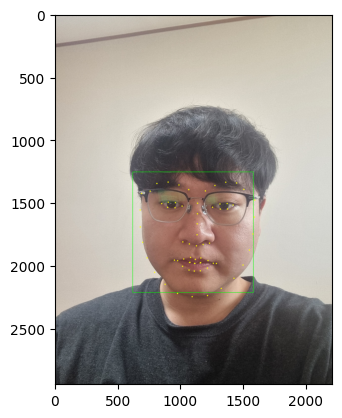

In [ ]:
# 랜드마크 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 5, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [ ]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[51]) # 가운데 쯤
    # 입술 위
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(1114, 1952)
(x,y) : (1128,1756)
(w,h) : (959,959)


In [ ]:
sticker_path = '/content/drive/MyDrive/face_detection/cat_beard.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w//3,h//3))
print (img_sticker.shape)

(319, 319, 3)


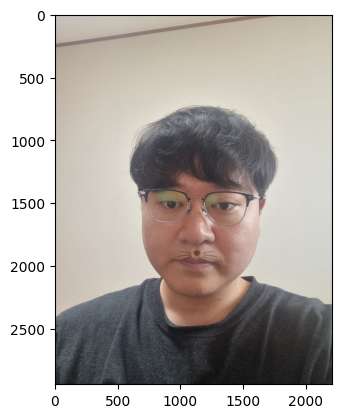

In [ ]:
# 스티커 합성|
img_show = img_bgr.copy()
img_rgb_2_ = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# 이미지 영역 지정
refined_x = x - img_sticker.shape[0] // 2
refined_y = y
h, w = img_sticker.shape[:2]
roi = img_rgb_2_[refined_y:refined_y+h, refined_x:refined_x+w]
# 이미지 국소 부위 합성
alpha = 0.85
blended_roi = cv2.addWeighted(roi, alpha, img_sticker, 1-alpha, 0)
# 밝기 조절
brightness = -20
blended_roi = cv2.convertScaleAbs(blended_roi, alpha=1, beta=brightness)
img_rgb_2_[refined_y:refined_y+h, refined_x:refined_x+w] = blended_roi

plt.imshow(img_rgb_2_)
plt.show()

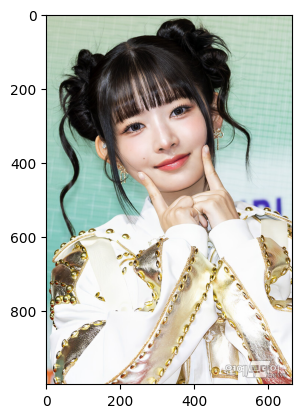

In [ ]:
rei_path = '/content/drive/MyDrive/face_detection/rei.jpg'
img_rei_bgr = cv2.imread(rei_path)
img_rei_show = img_rei_bgr.copy()
img_rei_rgb = cv2.cvtColor(img_rei_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rei_rgb)
plt.show()

[[(180, 352), (192, 380), (208, 407), (225, 432), (247, 452), (274, 468), (306, 477), (341, 480), (373, 474), (399, 458), (418, 436), (433, 410), (442, 380), (440, 346), (436, 315), (430, 284), (419, 254), (186, 303), (196, 282), (216, 267), (240, 260), (264, 262), (312, 245), (330, 228), (351, 218), (375, 216), (396, 226), (299, 281), (307, 302), (316, 324), (324, 346), (306, 373), (319, 372), (332, 371), (342, 362), (351, 354), (217, 318), (229, 303), (246, 297), (265, 304), (251, 312), (233, 318), (336, 279), (348, 260), (365, 253), (380, 258), (371, 268), (354, 274), (291, 415), (308, 404), (325, 393), (340, 392), (351, 383), (369, 379), (389, 377), (379, 397), (366, 410), (353, 418), (338, 421), (317, 422), (298, 414), (329, 405), (343, 402), (355, 395), (382, 382), (359, 394), (347, 401), (333, 405)]]


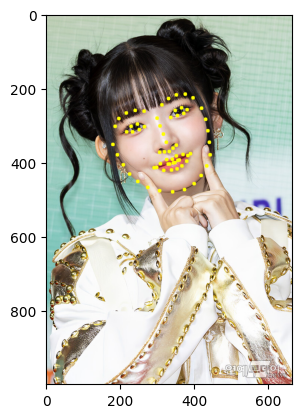

In [ ]:
detector_hog_ = dlib.get_frontal_face_detector()
img_rei_rgb = cv2.cvtColor(img_rei_bgr, cv2.COLOR_BGR2RGB)
dlib_rects_ = detector_hog_(img_rei_rgb, 1)
list_landmarks_ = []
for dlib_rect in dlib_rects_:
    points = landmark_predictor(img_rei_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks_.append(list_points)
print(list_landmarks_)
for landmark in list_landmarks_:
    for point in landmark:
        cv2.circle(img_rei_show, point, 5, (0, 255, 255), -1)

img_rei_show_rgb = cv2.cvtColor(img_rei_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_rei_show_rgb)
plt.show()

(340, 392)
(x,y) : (324,346)
(w,h) : (268,268)


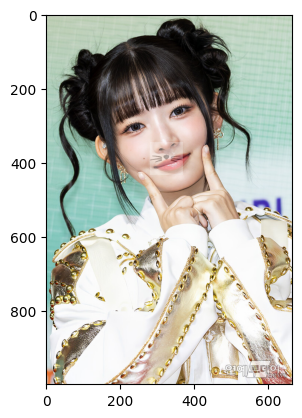

In [ ]:
for dlib_rect, landmark in zip(dlib_rects_, list_landmarks_):
    print (landmark[51]) # 가운데 쯤
    # 입술 위
    x_ = landmark[30][0]
    y_ = landmark[30][1]
    w_ = h_ = dlib_rect.width()
    print (f'(x,y) : ({x_},{y_})')
    print (f'(w,h) : ({w_},{h_})')

sticker_path_ = '/content/drive/MyDrive/face_detection/cat_beard.png'
img_sticker_ = cv2.imread(sticker_path_)
img_sticker_= cv2.resize(img_sticker_, (w_//3,h_//3))

# 스티커 합성|
img_rei_show = img_rei_bgr.copy()
img_rei_rgb_2 = cv2.cvtColor(img_rei_show, cv2.COLOR_BGR2RGB)
# 이미지 영역 지정
refined_x_ = x_ - img_sticker_.shape[0] // 2
refined_y_ = y_
h_, w_ = img_sticker_.shape[:2]
roi_ = img_rei_rgb_2[refined_y_:refined_y_+h_, refined_x_:refined_x_+w_]
# True면 파일 못 불러온 것
# 이미지 국소 부위 합성
alpha = 0.7
blended_roi_ = cv2.addWeighted(roi_, alpha, img_sticker_, 1-alpha, 0)
img_rei_rgb_2[refined_y_:refined_y_+h_, refined_x_:refined_x_+w_] = blended_roi_

plt.imshow(img_rei_rgb_2)
plt.show()

In [ ]:
# 결론
# 각도가 달라지면, 수염 위치 선정을 새로해야된다
# 원본 이미지가 어떤 밝기, 색깔 구성을 하느냐에 따라 합성하기 위한 파라미터들이 바뀌어야 한다
# 수염을 자동으로 회전시키는 것을 구현하려면, 사람이 어느정도 휘었는지를 계산하고 수염을 그만큼 회전시킨 뒤 합성하는 복잡한 과정을 거쳐야 할것이다